<a href="https://colab.research.google.com/github/0alfajar/Machine-Learning-Model-From-Scratch/blob/main/Lasso_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Lasso Regression

In [12]:
class Lasso_Regression():
    # initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameters):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameters = lambda_parameters

    # fitting the dataset to the lasso regression model
    def fit(self, X, y):
        # m --> number of data points --> number of rows
        # n --> number of input feature --> number of columns
        self.m, self.n = X.shape
        # initialising the weights and bias
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        # gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    # function for updating the weight and bias
    def update_weights(self):
        # linear equation of the model
        y_prediction = self.predict(self.X)

        # gradients (dw, db)
        dW = np.zeros(self.n)

        for i in range(self.n):
            if self.W[i] > 0:
                dW[i] = (-(2 * (self.X[:, i]).dot(self.y - y_prediction)) + self.lambda_parameters) / self.m
            else:
                dW[i] = (-(2 * (self.X[:, i]).dot(self.y - y_prediction)) - self.lambda_parameters) / self.m

        # gradient for bias
        db = -2 * np.sum(self.y - y_prediction) / self.m

        # updating the weights and bias
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    # predicting the target variable
    def predict(self, X):
        return X.dot(self.W) + self.b

In [3]:
# load data
salary_data = pd.read_csv('salary_data.csv')

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
model = Lasso_Regression(learning_rate=0.01, no_of_iterations=1000, lambda_parameters=0.1)

In [15]:
model.fit(X_train, y_train)

In [17]:
print('weight : ', model.W[0])
print('bias : ', model.b)

weight :  9634.785033076549
bias :  23935.493578683545


In [18]:
test_data_pred = model.predict(X_test)

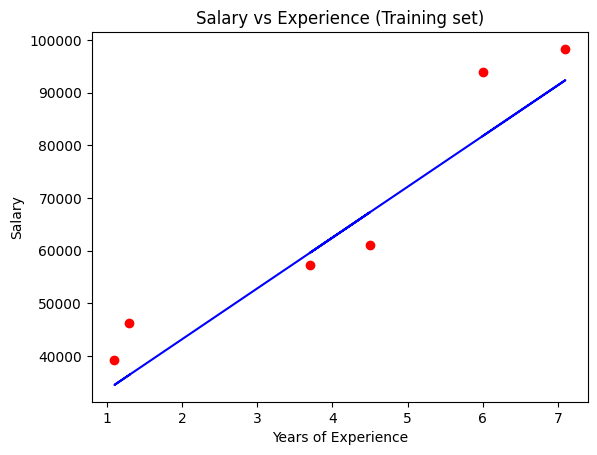

In [20]:
# vizualizing
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, test_data_pred, color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()